# NLP - Natural language processing

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from collections import Counter
import random

from sklearn.model_selection import train_test_split

## Load IMDB movie reviews dataset

In [2]:
path = "../data/aclImdb_v1/aclImdb/"


def load_from_subfoler():
    X = []
    y = []
    for subfolder in ['train/', 'test/']:
        for subsubfolder in ['pos/', 'neg/']:
            n = len(os.listdir(path + subfolder + subsubfolder))
            for i, file in enumerate(os.listdir(path + subfolder + subsubfolder)):
                sentiment = int(file.split('.')[0].split("_")[1])
                with open(path + subfolder + subsubfolder + file, 'r', encoding='utf-8') as f:
                    review = f.read()
                X.append(review)
                y.append(sentiment)
            print(f"{subfolder + subsubfolder} loaded.")
    return X, y


X, y = load_from_subfoler()

train/pos/ loaded.
train/neg/ loaded.
test/pos/ loaded.
test/neg/ loaded.


,review,sentiment,sentiment_binary
0,"I don't know much about the Rat Pack, and Fran...",10,1
1,"Looking at some of the negative posts, you rea...",10,1
2,"It was only on my second viewing, years later,...",8,1
3,"I recently started watching this show, and I h...",10,1
4,"Yes, as unbelievable as it may be, in 1968 a m...",10,1
...,...,...,...
49995,"In watching Enterprise for the first time, as ...",2,0
49996,"There have been many movies, on living the Ame...",1,0
49997,"""Graduation Day"" - <br /><br />i bought this m...",2,0
49998,I have never watched a movie that frustrated m...,3,0


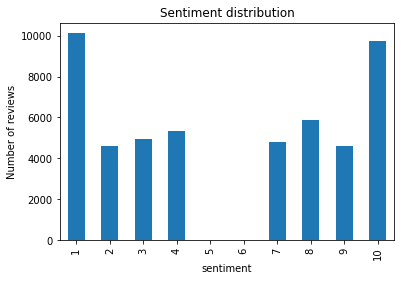

In [3]:
df = pd.DataFrame({'review': X, 'sentiment': y})
df['sentiment_binary'] = df['sentiment'].apply(lambda x: 1 if x > 5 else 0)

df['sentiment'].value_counts().reindex(range(1, 11), fill_value=0).plot(
    kind='bar',
    title='Sentiment distribution',
    ylabel='Number of reviews',
)

df

# Predicting the sentiment

## Prepare data for training

In [13]:
tokens = list(map(lambda x: set(x.split(" ")), df['review'].values))

vocab = set()

for sent in tokens:
    for word in sent:
        if len(word) > 0:
            vocab.add(word)

vocab = list(vocab)

print(f"Vocabulary size: {len(vocab)}")

word2idx = {w: idx for (idx, w) in enumerate(vocab)}

Vocabulary size: 439838


In [14]:
df['review_tokens'] = df['review'].apply(
    lambda x: np.unique([word2idx[i] for i in x.split(" ")])
)

df

,review,sentiment,sentiment_binary,review_tokens
0,"I don't know much about the Rat Pack, and Fran...",10,1,"[2696, 6410, 8723, 15514, 16539, 23217, 23490,..."
1,"Looking at some of the negative posts, you rea...",10,1,"[25099, 27324, 30779, 34020, 35531, 37961, 432..."
2,"It was only on my second viewing, years later,...",8,1,"[2817, 3291, 6846, 14144, 17734, 18463, 25395,..."
3,"I recently started watching this show, and I h...",10,1,"[7032, 23217, 23674, 27157, 29677, 30119, 3077..."
4,"Yes, as unbelievable as it may be, in 1968 a m...",10,1,"[1927, 12075, 14124, 18640, 22589, 27280, 3077..."
...,...,...,...,...
49995,"In watching Enterprise for the first time, as ...",2,0,"[206, 267, 2696, 3240, 6156, 6654, 10332, 1119..."
49996,"There have been many movies, on living the Ame...",1,0,"[630, 5813, 13547, 15262, 15323, 23490, 30119,..."
49997,"""Graduation Day"" - <br /><br />i bought this m...",2,0,"[2696, 6536, 7491, 23261, 30368, 30597, 30779,..."
49998,I have never watched a movie that frustrated m...,3,0,"[6156, 25108, 30779, 33617, 34020, 37961, 3850..."


,review,sentiment,sentiment_binary,review_tokens
0,"I don't know much about the Rat Pack, and Fran...",10,1,"[2696, 6410, 8723, 15514, 16539, 23217, 23490,..."
1,"Looking at some of the negative posts, you rea...",10,1,"[25099, 27324, 30779, 34020, 35531, 37961, 432..."
2,"It was only on my second viewing, years later,...",8,1,"[2817, 3291, 6846, 14144, 17734, 18463, 25395,..."
3,"I recently started watching this show, and I h...",10,1,"[7032, 23217, 23674, 27157, 29677, 30119, 3077..."
4,"Yes, as unbelievable as it may be, in 1968 a m...",10,1,"[1927, 12075, 14124, 18640, 22589, 27280, 3077..."
...,...,...,...,...
49995,"In watching Enterprise for the first time, as ...",2,0,"[206, 267, 2696, 3240, 6156, 6654, 10332, 1119..."
49996,"There have been many movies, on living the Ame...",1,0,"[630, 5813, 13547, 15262, 15323, 23490, 30119,..."
49997,"""Graduation Day"" - <br /><br />i bought this m...",2,0,"[2696, 6536, 7491, 23261, 30368, 30597, 30779,..."
49998,I have never watched a movie that frustrated m...,3,0,"[6156, 25108, 30779, 33617, 34020, 37961, 3850..."


In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    df['review_tokens'].values,
    df['sentiment_binary'].values,
    test_size=0.2,
    random_state=42,
)

## Linear model with embedding layer

#### Embedding layer

Taking a vector of 1s and 0s is mathematically equivalent to summing several rows of a matrix. Thus, it’s much more efficient to select the relevant rows of weights_0_1and sum them as opposed to doing a big vector-matrix multiplication. Because the sentiment vocabulary is on the order of 70,000 words, most of the vector-matrix multiplication is spent multiplying 0s in the input vector by different rows of the matrix before summing them. Selecting the rows corresponding to each word in a matrix and summing them is much more efficient.

$$
\begin{bmatrix} 0 & \textbf{1} & 0 & 0 & \textbf{1}
\end{bmatrix}

\begin{bmatrix} 0.1 & 0.2 & 0.3 & 0.4 & 0.5 \\
\textbf{0.6} & \textbf{0.7} & \textbf{0.8} & \textbf{0.9} & \textbf{1.0} \\
0.11 & 0.12 & 0.13 & 0.14 & 0.15 \\
0.16 & 0.17 & 0.18 & 0.19 & 0.20 \\
\textbf{0.21} & \textbf{0.22} & \textbf{0.23} & \textbf{0.24} & \textbf{0.25} \\
\end{bmatrix}

= \begin{bmatrix} 0.81 \\ 0.92 \\ 1.03 \\ 1.14 \\ 1.25 \\
\end{bmatrix}
$$

Using this process of selecting rows and performing a sum (or average) means treating the first linear layer (weights_0_1) as an embedding layer. Structurally, they’re identical (layer_1is exactly the same using either method for forward propagation). The only difference is that summing a small number of rows is much faster.

In [80]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


alpha, epochs = (0.01, 2)
hidden_size = 100

weights_0_1 = 0.2 * np.random.random((len(vocab), hidden_size)) - 0.1
weights_1_2 = 0.2 * np.random.random((hidden_size, 1)) - 0.1

correct, total = (0, 0)

train_accs = []
test_accs = []

for e in range(epochs):
    for i in range(len(X_train)):
        x, y = (X_train[i], y_train[i])

        layer_1 = sigmoid(np.sum(weights_0_1[x], axis=0))  # embed + sigmoid
        layer_2 = sigmoid(np.dot(layer_1, weights_1_2))

        layer_2_delta = layer_2 - y
        layer_1_delta = layer_2_delta.dot(weights_1_2.T)

        weights_0_1[x] -= layer_1_delta * alpha
        weights_1_2 -= np.outer(layer_1, layer_2_delta) * alpha

        if np.abs(layer_2_delta) < 0.5:
            correct += 1
        total += 1

        if i % 1000 == 0:
            progress = str(i / float(len(X_train)))

            print(f"Progress: {progress[:4]} Training Accuracy: {round(correct / float(total), 4)}")
            train_accs.append((e * len(X_train) + i, correct / float(total)))

    correct, total = (0, 0)
    for i in range(len(X_test)):
        x, y = (X_test[i], y_test[i])
        layer_1 = sigmoid(np.sum(weights_0_1[x], axis=0))
        layer_2 = sigmoid(np.dot(layer_1, weights_1_2))

        if np.abs(layer_2 - y) < 0.5:
            correct += 1
        total += 1

    print(f"Test Accuracy: {correct / float(total)}\n")
    test_accs.append(((e + 1) * len(X_train), correct / float(total)))

Progress: 0.0 Training Accuracy: 1.0
Progress: 0.02 Training Accuracy: 0.5245
Progress: 0.05 Training Accuracy: 0.5797
Progress: 0.07 Training Accuracy: 0.6341
Progress: 0.1 Training Accuracy: 0.6701
Progress: 0.12 Training Accuracy: 0.6949
Progress: 0.15 Training Accuracy: 0.711
Progress: 0.17 Training Accuracy: 0.7239
Progress: 0.2 Training Accuracy: 0.7347
Progress: 0.22 Training Accuracy: 0.7459
Progress: 0.25 Training Accuracy: 0.7543
Progress: 0.27 Training Accuracy: 0.7624
Progress: 0.3 Training Accuracy: 0.7675
Progress: 0.32 Training Accuracy: 0.7736
Progress: 0.35 Training Accuracy: 0.7779
Progress: 0.37 Training Accuracy: 0.7823
Progress: 0.4 Training Accuracy: 0.7855
Progress: 0.42 Training Accuracy: 0.7898
Progress: 0.45 Training Accuracy: 0.7933
Progress: 0.47 Training Accuracy: 0.7958
Progress: 0.5 Training Accuracy: 0.7988
Progress: 0.52 Training Accuracy: 0.8006
Progress: 0.55 Training Accuracy: 0.8023
Progress: 0.57 Training Accuracy: 0.8043
Progress: 0.6 Training Acc

Text(0, 0.5, 'Accuracy [%]')

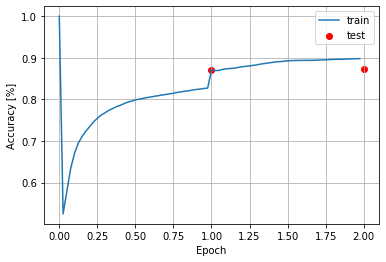

In [82]:
def cast_x_axis_to_epochs(X):
    a, b = zip(*X)
    a = list(np.array(a) / float(len(X_train)))
    return zip(a, b)


plt.plot(*zip(*cast_x_axis_to_epochs(train_accs)), label='train')
plt.scatter(*zip(*cast_x_axis_to_epochs(test_accs)), label='test', color='red')
plt.legend()
plt.grid()
plt.xlabel('Epoch')
plt.ylabel('Accuracy [%]')

## Comparing word embeddings

In [93]:
def similar(target, limit=5):
    target_idx = word2idx[target]
    target_vec = weights_0_1[target_idx]

    if limit > len(vocab):
        limit = len(vocab)

    distances = []
    for i, word in enumerate(vocab):
        if word != target:
            vec = weights_0_1[i]
            distances.append((word, round(np.linalg.norm(target_vec - vec), 2)))

    return sorted(distances, key=lambda x: x[1])[1:limit + 1]


def print_similar(word):
    print(f"Similar words to {word}:")
    for w in similar(word):
        print(f"\t{w[0]} ({w[1]})")


print_similar("beautiful")
print_similar("terrible")

Similar words to beautiful:
	atmosphere (0.69)
	gem, (0.71)
	wax (0.73)
	9/10 (0.74)
	/>Still, (0.74)
Similar words to terrible:
	tedious (0.74)
	save (0.75)
	awful, (0.75)
	bad. (0.78)
	pointless (0.79)


# Fill in the blank

In [4]:
tokens = list(map(lambda x: x.split(" "), df['review'].values))

wordcnt = Counter()
for sent in tokens:
    for word in sent:
        wordcnt[word] -= 1
vocab = list(set(map(lambda x: x[0], wordcnt.most_common())))

word2idx = {}
for i, word in enumerate(vocab):
    word2idx[word] = i

concatenated = []
input_dataset = []
for sent in tokens:
    sent_indices = []
    for word in sent:
        try:
            sent_indices.append(word2idx[word])
            concatenated.append(word2idx[word])
        except:
            ""
    input_dataset.append(sent_indices)
concatenated = np.array(concatenated)

random.shuffle(input_dataset)

In [16]:
alpha, epochs = (0.05, 2)
hidden_size, window, negative = (50, 2, 5)

weights_0_1 = (np.random.rand(len(vocab), hidden_size) - 0.5) * 0.2
weights_1_2 = np.random.rand(len(vocab), hidden_size) * 0

layer_2_target = np.zeros(negative + 1)
layer_2_target[0] = 1


def similar(target, limit=10):
    target_idx = word2idx[target]
    target_vec = weights_0_1[target_idx]

    scores = Counter()
    for word, i in word2idx.items():
        vec = weights_0_1[i] - weights_0_1[target_idx]
        squared_dist = vec * vec
        scores[word] = -np.sqrt(sum(squared_dist))
    return scores.most_common(limit)


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


for rev_i, review in enumerate(input_dataset * epochs):
    for target_i in range(len(review)):
        target_samples = [review[target_i]] + list(
            concatenated[(np.random.rand(negative) * len(concatenated)).astype('int').tolist()])
        left_context = review[max(0, target_i - window):target_i]
        right_context = review[target_i + 1:min(len(review), target_i + window)]

        layer_1 = np.mean(weights_0_1[left_context + right_context], axis=0)
        layer_2 = sigmoid(layer_1.dot(weights_1_2[target_samples].T))

        layer_2_delta = layer_2 - layer_2_target
        layer_1_delta = layer_2_delta.dot(weights_1_2[target_samples])

        weights_0_1[left_context + right_context] -= layer_1_delta * alpha
        weights_1_2[target_samples] -= np.outer(layer_2_delta, layer_1) * alpha

    if rev_i % 250 == 0:
        print(f"Progress: {round(rev_i / float(len(input_dataset) * epochs), 3)}")
        # print(f"Test accuracy: {round(np.mean([1 if word in similar(word)[:4] else 0 for word in vocab]), 3)}")



Progress: 0.0
Progress: 0.003
Progress: 0.005
Progress: 0.007
Progress: 0.01
Progress: 0.013
Progress: 0.015
Progress: 0.018
Progress: 0.02
Progress: 0.022
Progress: 0.025
Progress: 0.028
Progress: 0.03
Progress: 0.033
Progress: 0.035
Progress: 0.037
Progress: 0.04
Progress: 0.043
Progress: 0.045
Progress: 0.048
Progress: 0.05
Progress: 0.052
Progress: 0.055
Progress: 0.058
Progress: 0.06
Progress: 0.062
Progress: 0.065
Progress: 0.068
Progress: 0.07
Progress: 0.072
Progress: 0.075
Progress: 0.077
Progress: 0.08
Progress: 0.083
Progress: 0.085
Progress: 0.087
Progress: 0.09
Progress: 0.092
Progress: 0.095
Progress: 0.098
Progress: 0.1
Progress: 0.102
Progress: 0.105
Progress: 0.107
Progress: 0.11
Progress: 0.113
Progress: 0.115
Progress: 0.117
Progress: 0.12
Progress: 0.122
Progress: 0.125
Progress: 0.128
Progress: 0.13
Progress: 0.133
Progress: 0.135
Progress: 0.138
Progress: 0.14
Progress: 0.142
Progress: 0.145
Progress: 0.147
Progress: 0.15
Progress: 0.152
Progress: 0.155
Progress: 

In [17]:
print("Similar words to 'terrible':")
print(similar("terrible"))

Similar words to 'terrible':
[('terrible', -0.0), ('horrible', -2.8164821106641833), ('dreadful', -3.3138343827504904), ('splendid', -3.442779428963893), ('brilliant', -3.5244437772414545), ('mediocre', -3.562157391014161), ('crappy', -3.6207349878076354), ('wonderful', -3.715391499362222), ('horrendous', -3.7266735665135156), ('fabulous', -3.795992280499484)]


## King - Man + Woman ~= Queen

In [19]:
def analogy(positive, negative):
    norms = np.sum(weights_0_1 * weights_0_1, axis=1)
    norms.resize(norms.shape[0], 1)

    normed_weights = weights_0_1 * norms

    query_vect = np.zeros(len(weights_0_1[0]))
    for word in positive:
        query_vect += normed_weights[word2idx[word]]
    for word in negative:
        query_vect -= normed_weights[word2idx[word]]

    scores = Counter()
    for word, index in word2idx.items():
        raw_difference = weights_0_1[index] - query_vect
        squared_difference = raw_difference * raw_difference
        scores[word] = -np.sqrt(sum(squared_difference))

    return scores.most_common(10)[1:]

In [20]:
analogy(['terrible', 'good'], ['bad'])

[('decent', -342.32756293728033),
 ('nice', -342.9588963641498),
 ('fine', -343.09715527965426),
 ('terrific', -343.10555302337855),
 ('great', -343.54084381478344),
 ('compelling', -343.7423099856262),
 ('solid', -343.7817746080445),
 ('brief', -343.7923945454832),
 ('pleasant', -343.8000931523861)]

In [21]:
analogy(['elizabeth', 'he'], ['she'])

[('unless', -133.95702239591307),
 ('/>Directed', -133.96289838334192),
 ('/>Most', -134.05407145589422),
 ('albeit', -134.0720228728984),
 ('sheer', -134.08710803133076),
 ('all.<br', -134.12072237194357),
 ('portrayal', -134.2454441164066),
 ('spite', -134.29580981276462),
 ('/>Speaking', -134.36538728988552)]